<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Backpropagation-Practice" data-toc-modified-id="Backpropagation-Practice-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Backpropagation Practice</a></span><ul class="toc-item"><li><span><a href="#Data-Science-Unit-4-Sprint-2-Assignment-2" data-toc-modified-id="Data-Science-Unit-4-Sprint-2-Assignment-2-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><em>Data Science Unit 4 Sprint 2 Assignment 2</em></a></span></li><li><span><a href="#Try-building/training-a-more-complex-MLP-on-a-bigger-dataset." data-toc-modified-id="Try-building/training-a-more-complex-MLP-on-a-bigger-dataset.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Try building/training a more complex MLP on a bigger dataset.</a></span></li><li><span><a href="#Stretch-Goals:" data-toc-modified-id="Stretch-Goals:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Stretch Goals:</a></span></li></ul></li></ul></div>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [1]:
# doing some imports
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)

# creating the df
df = pd.DataFrame({"x1": [0,0,1,0,1,1,0], "x2": [0,1,0,1,0,1,0], "x3": [1,1,1,0,0,1,0], "y": [0,1,1,1,1,0,0]})

df

,x1,x2,x3,y
0,0,0,1,0
1,0,1,1,1
2,1,0,1,1
3,0,1,0,1
4,1,0,0,1
5,1,1,1,0
6,0,0,0,0


In [3]:

X = df[["x1", "x2", "x3"]]
y = df["y"]

X.shape, y.shape

((7, 3), (7,))

In [4]:
# Creating my class for the multilayered percetron

class Network:

    def __init__(self, inputs=3, hidden=4, output=1):
        # setting up the architecture
        self.inputs = inputs
        self.hidden = hidden
        self.output = output

        # Will initialize the weights randomly
        self.weights1 = np.random.randn(self.inputs, self.hidden)
        self.weights2 = np.random.randn(self.hidden, self.output)

    # doing the sigmoid function 
    def __sigmoid(self, x):
        return 1/(1 + np.exp(-x))

    # doing the feedforward
    def feedforward(self, X):

        # creating the sums for the specific nodes
        self.hidden_sum = np.dot(X, self.weights1)

        self.activated_hidden = self.__sigmoid(self.hidden_sum)
        # now sending to the  output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        # do the acitivation for the output layer
        self.activated_output = self.__sigmoid(self.output_sum)

        return self.activated_output



In [5]:
X.iloc[0]

x1    0
x2    0
x3    1
Name: 0, dtype: int64

In [6]:
# trying a prediction with just the feed forward
net = Network()
output = net.feedforward(X.iloc[0])
print("correct was ", y.iloc[0])
print("guess was ", output)

correct was  0
guess was  [0.11922027]


In [7]:
# Creating my class for the multilayered percetron

class Network:

    def __init__(self, inputs=3, hidden=4, output=1):
        # setting up the architecture
        self.inputs = inputs
        self.hidden = hidden
        self.output = output

        # Will initialize the weights randomly
        self.weights1 = np.random.randn(self.inputs, self.hidden)
        self.weights2 = np.random.randn(self.hidden, self.output)

    # doing the sigmoid function 
    def __sigmoid(self, x):
        return 1/(1 + np.exp(-x))

    # the sigmoid prime or derivitive method
    def __sigmoidPrime(self, x):
        sig = self.__sigmoid(x)
        return sig * (1 - sig)

    # making a function that will make the y the same shape as the 0
    def __make_right_shape(self, o, y):
        if o.shape != y.shape:
            # turning the y into a numpy array
            numpy_y = np.array(y)
            newShape = np.reshape(numpy_y, o.shape)
            return newShape
        else:
            return y
        

    # function to change the output to a whole number (1 or 0)
    def change_to_whole_num(self, output):
        #min = a if a < b else b 
        #output = 1 if output > .5 else 0 
        theList = []
        for val in output:
            if val < .5:
                theList.append(0)
            else:
                theList.append(1)
        return theList
            

    # doing the feedforward
    def feedforward(self, X):

        # creating the sums for the specific nodes
        self.hidden_sum = np.dot(X, self.weights1)

        self.activated_hidden = self.__sigmoid(self.hidden_sum)
        # now sending to the  output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        # do the acitivation for the output layer
        self.activated_output = self.__sigmoid(self.output_sum)

        return self.activated_output

    # doing some more methods
    def backprop(self, X, y, o):
        #breakpoint()

        # making sure the shape is the right shape
        y = self.__make_right_shape(o, y)

        self.o_error = y - o

        # Apply derivative of sigmoid to the  error 
        # to find the amount to adjust
        self.o_delta = self.o_error * self.__sigmoidPrime(self.output_sum)

        self.z2_error = self.o_delta.dot(self.weights2.T)

        # getting the z2 delta
        self.z2_delta = self.z2_error * self.__sigmoidPrime(self.hidden_sum)

        self.weights1 = self.weights1 + X.T.dot(self.z2_delta)
        self.weights2 = self.weights2 + self.activated_hidden.T.dot(self.o_delta)
    
    # run Epoch
    def __run_epoch_W_back_prop(self, X, y):
        output = self.feedforward(X)
        self.backprop(X,y, output)
    # building the function that will do the training for the neural network

    def  train(self, X, y, numEpoch=10000):
        for i in range(numEpoch):
            self.__run_epoch_W_back_prop(X,y)

    def predict(self, x, make_whole=True):
        # to do the prediction we wil do feedforward for what is passed 
        # in using the weghts that are now stored
        output = self.feedforward(x)
        if make_whole == True:
            output = self.change_to_whole_num(output)
        return output

In [8]:
# Trying the class to see how it is working

n = Network()


In [9]:
n.train(X, y)

In [13]:
# Running the predict function showing the 
# real activated outputs
output = n.predict(X, make_whole=False)
output

array([[0.00167466],
       [0.98873104],
       [0.98616994],
       [0.98907627],
       [0.98723266],
       [0.01648135],
       [0.02080801]])

In [14]:
# Running it with the whole number predictions
output = n.predict(X)
output

[0, 1, 1, 1, 1, 0, 0]

In [68]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [17]:
import numbers as np
# Doing the same thing but now with Tensor Flow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
# Doing the same data set but this time using the tensorflow 
# library
model = Sequential([
    Dense(4, activation="relu", input_dim=3 ),
    Dense(1, activation="relu")
])

model.compile(optimizer="sgd", loss="mse", metrics=["mae", "mse"])

In [30]:
# making the data into a format that can be used by the 
# tensorflow
X_numpy = X.to_numpy()
y_numpy = y.to_numpy()
X_numpy

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 1, 1],
       [0, 0, 0]], dtype=int64)

In [33]:
results = model.fit(X_numpy, y_numpy, epochs=1000)

och 824/1000
7/7 [==============================] - 0s 429us/sample - loss: 0.1197 - mae: 0.2763 - mse: 0.1197
Epoch 825/1000
7/7 [==============================] - 0s 572us/sample - loss: 0.1196 - mae: 0.2759 - mse: 0.1196
Epoch 826/1000
7/7 [==============================] - 0s 429us/sample - loss: 0.1196 - mae: 0.2756 - mse: 0.1196
Epoch 827/1000
7/7 [==============================] - 0s 286us/sample - loss: 0.1195 - mae: 0.2753 - mse: 0.1195
Epoch 828/1000
7/7 [==============================] - 0s 429us/sample - loss: 0.1194 - mae: 0.2749 - mse: 0.1194
Epoch 829/1000
7/7 [==============================] - 0s 429us/sample - loss: 0.1193 - mae: 0.2747 - mse: 0.1193
Epoch 830/1000
7/7 [==============================] - 0s 286us/sample - loss: 0.1193 - mae: 0.2745 - mse: 0.1193
Epoch 831/1000
7/7 [==============================] - 0s 286us/sample - loss: 0.1193 - mae: 0.2743 - mse: 0.1193
Epoch 832/1000
7/7 [==============================] - 0s 429us/sample - loss: 0.1193 - mae: 0.2749

In [35]:
pred = model.predict(X_numpy, )
pred

array([[0.01372722],
       [0.9340152 ],
       [0.63417697],
       [0.97128713],
       [0.57565284],
       [0.6491444 ],
       [0.19886363]], dtype=float32)

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


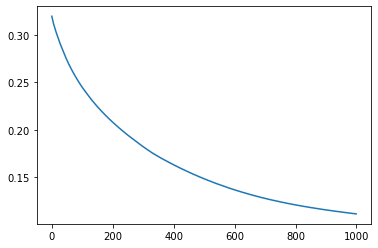

In [41]:
# Doing a plotting of the change in the loss
plt.plot(results.history["loss"])

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [58]:
# Getting the data set
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten

In [90]:
# Loading the data
(x_train, y_train), (x_test, y_test)  = mnist.load_data()
print((X_train.shape), y_train.shape)
print("\nThe shapes of the test values")
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)

The shapes of the test values
(10000, 28, 28) (10000,)


In [91]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [92]:
# Doing some normalization
x_train = x_train/255
x_test = x_test/255

In [98]:
# Will be flattening the array
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [94]:
y_train[0]

5

In [95]:
from tensorflow.keras.utils import to_categorical
y_test_binary = to_categorical(y_test)
y_train_binary = to_categorical(y_train)


In [99]:
# fitting the model
model.fit(x_train, y_train_binary, epochs=10, 
                validation_data=(x_test, y_test_binary))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4013 - accuracy: 0.8868 - val_loss: 0.2614 - val_accuracy: 0.9241
Epoch 2/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2358 - accuracy: 0.9330 - val_loss: 0.2133 - val_accuracy: 0.9357
Epoch 3/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1951 - accuracy: 0.9440 - val_loss: 0.1923 - val_accuracy: 0.9453
Epoch 4/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1695 - accuracy: 0.9511 - val_loss: 0.1801 - val_accuracy: 0.9485
Epoch 5/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1538 - accuracy: 0.9553 - val_loss: 0.1588 - val_accuracy: 0.9535
Epoch 6/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1418 - accuracy: 0.9580 - val_loss: 0.1582 - val_accuracy: 0.9559
Epoch 7/10
60000/60000 [==============================] 

In [100]:
model.predict(x_test)

array([[6.90826801e-06, 8.70155545e-11, 4.45211772e-04, ...,
        9.98606622e-01, 3.62628498e-06, 1.36997551e-05],
       [3.17126130e-08, 4.41217935e-06, 9.98472154e-01, ...,
        3.38671792e-14, 3.03231946e-06, 3.70132341e-10],
       [1.05897826e-07, 9.97816443e-01, 1.72994361e-04, ...,
        9.75531002e-04, 8.06573080e-04, 3.51112976e-05],
       ...,
       [3.99184782e-11, 5.10512799e-10, 1.20066429e-10, ...,
        2.77918207e-05, 6.04545530e-05, 5.13284031e-05],
       [3.00030056e-10, 1.94968333e-10, 4.49252614e-12, ...,
        1.49644663e-09, 8.87583737e-05, 4.22653113e-09],
       [9.69370149e-07, 4.08516970e-11, 8.59472564e-08, ...,
        3.82011615e-13, 2.70109157e-10, 2.62060443e-11]], dtype=float32)

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?